In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


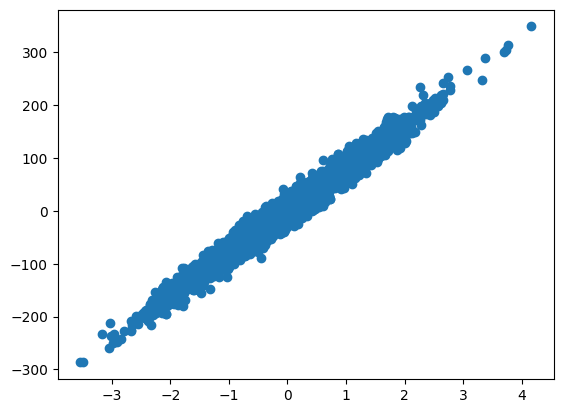

In [11]:
# Loading the data

x = pd.read_csv('data/Linear_X_Train.csv')
y = pd.read_csv('data/Linear_Y_Train.csv')

# Convert to numpy
x = x.values
y = y.values

# Normalising

u = x.mean()
sd = x.std()
x = (x-u)/sd

# Visualization
plt.scatter(x,y)

## Linear Regression

Using Iterative Method

## Predictions and Best Line

## Computing Score

In [ ]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    dem = np.sum((Y-Y.mean())**2)
    score = (1- num/dem)
    return score*100

In [ ]:
r2_score(y,y_)